<a href="https://colab.research.google.com/github/Saharsh2k5/ML_ASSIGNMENT_2/blob/main/ML_Assignment2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples).astype(np.float32)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples).astype(np.float32)
y = f_x + eps

def avg_loss(a,b):
  loss=0
  for i in range(len(a)):
    loss+=(a[i] - b[i]) ** 2
  return loss/len(a)

def loss(a, b):
    return (a - b) ** 2


1) Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form
θ
1
x
+
θ
0
) for any given values of
(
θ
0
,
θ
1
)
. [1 mark]

In [ ]:
torch.manual_seed(45)

Theta0 = torch.randn(1, requires_grad=True)
Theta1 = torch.randn(1, requires_grad=True)
X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)

Predictions = Theta1 * X1 + Theta0

Ground_Truth = torch.tensor(y).unsqueeze(1)

total_loss = torch.tensor(0.0)

for i in range(num_samples):
    total_loss = total_loss + loss(Predictions[i], Ground_Truth[i])

L = (1 / num_samples) * total_loss

L.backward()

print("Gradient of loss with respect to Theta0:",Theta0.grad)
print("Gradient of loss with respect to Theta1:",Theta1.grad)


Gradient of loss with respect to Theta0: tensor([-9.6971])
Gradient of loss with respect to Theta1: tensor([-0.8155])


2) Using the same
(
θ
0
,
θ
1
)
 as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. [1 mark]

In [ ]:
X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
Ground_Truth = torch.tensor(y).unsqueeze(1)

torch.manual_seed(45)

Theta0 = torch.randn(1, requires_grad=True)
Theta1 = torch.randn(1, requires_grad=True)

total_grad_Theta0 = torch.tensor([0.0])
total_grad_Theta1 = torch.tensor([0.0])

E = np.random.randint(1,10)
for epoch in range(E):
    indices = torch.randperm(num_samples)
    X1_shuffled = X1[indices]
    y_shuffled = Ground_Truth[indices]

    for i in range(num_samples):
        Theta0.grad=None
        Theta1.grad=None

        Predictions = Theta1 * X1_shuffled[i] + Theta0

        individual_loss = loss(Predictions, y_shuffled[i])

        individual_loss.backward()

        total_grad_Theta0 += Theta0.grad
        total_grad_Theta1 += Theta1.grad

Theta0_grad = (1 / (num_samples * E)) * total_grad_Theta0
Theta1_grad = (1 / (num_samples * E)) * total_grad_Theta1

print("Gradient of loss with respect to Theta0:", Theta0_grad.item())
print("Gradient of loss with respect to Theta1:", Theta1_grad.item())


Gradient of loss with respect to Theta0: -9.697078704833984
Gradient of loss with respect to Theta1: -0.8155001997947693


From the above results,its clear that the stochastic gradient is a good estimate of the true gradient.

3) Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of
ϵ
 (or
ϵ
-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose
ϵ
=
0.001
 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. [2 marks]

In [ ]:
#Def Contour Plotting and Loss Function

def plot_contour(X, Y, Z, filled=True, path=[]):
    plt.figure(figsize=(12, 8))
    contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')

    if filled:
        plt.contourf(X, Y, Z, levels=50, alpha=0.5, cmap='viridis')

    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=5, linestyle='-', linewidth=1)
    plt.plot([], [], color='red', label='Trajectory')

    plt.colorbar(label='Loss')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.title('Contour Plot of Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def f(x, y, x1, f_y):
    constant = 0
    for i in range(len(x1)):
        constant += (f_y[i] ** 2)
    coeff_x2 = num_samples
    coeff_y2 = 0
    for i in range(len(x1)):
        coeff_y2 += (x1[i] ** 2)
    coeff_x = 0
    for i in range(len(x1)):
        coeff_x += 2 * f_y[i]
    coeff_y = 0
    for i in range(len(x1)):
        coeff_y += 2 * f_y[i] * x1[i]
    coeff_xy = 0
    for i in range(len(x1)):
        coeff_xy += 2 * x1[i]
    return (constant + coeff_x2 * x ** 2 + coeff_y2 * y ** 2 - coeff_x * x - coeff_y * y + coeff_xy * x * y) / num_samples

In [ ]:
#Finding Optimal Theta
import numpy as np
num_samples=40
np.random.seed(45)
x1 = np.random.uniform(-1, 1, num_samples).astype(np.float32)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples).astype(np.float32)
y = f_x + eps

X_b = np.c_[np.ones((x1.shape[0], 1)), x1]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
Optimal_Theta0 = theta_best[0]
Optimal_Theta1 = theta_best[1]
print("Optimal theta0:", Optimal_Theta0)
print("Optimal theta1:", Optimal_Theta1)

Optimal theta0: 3.95070641725477
Optimal theta1: 2.6824689564558795


In [ ]:
def GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,method):
  np.random.seed(45)
  a=np.random.randint(100)
  torch.manual_seed(42)
  X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
  Ground_Truth = torch.tensor(y).unsqueeze(1)
  num_samples=40
  learning_rates = torch.tensor([0.0001, 0.001, 0.01, 0.1, 1, 10], requires_grad=False)

  Optimal_Theta0 = torch.tensor(Optimal_Theta0, requires_grad=False)
  Optimal_Theta1 = torch.tensor(Optimal_Theta1, requires_grad=False)
  Optimal_learning_rate=0
  prev_epoch_count=1000000000000000
  for alpha in learning_rates:
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)
    learning_rate=alpha
    number_of_epochs=0
    number_of_iters=0
    if(method=='SGD'):
      while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):
          # if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
          #   break
          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            Theta0_tensor -= learning_rate * Theta0_tensor.grad
            Theta1_tensor -= learning_rate * Theta1_tensor.grad
            number_of_iters+=1
        number_of_epochs+=1
    elif(method=='FBGD'):
        number_of_batches=1
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            # if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
            #   break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              number_of_iters+=1
          number_of_epochs+=1
    elif(method=='MBGD'):
        number_of_batches=5
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            # if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
            #   break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              number_of_iters+=1
          number_of_epochs+=1
    # print("Theta0=",Theta0_tensor.item(),"Theta1=",Theta1_tensor.item())
    # print('Learning Rate:', learning_rate.item(),'Number of Epochs=',number_of_epochs,'Number of Iterations=',number_of_iters)
    if(number_of_epochs<prev_epoch_count and not np.isnan(Theta0_tensor.item()) and not np.isnan(Theta1_tensor.item())):
        prev_epoch_count=number_of_epochs
        Optimal_learning_rate= learning_rate.item()
  print("Optimal Learning Rate=",Optimal_learning_rate)
  return Optimal_learning_rate
print("Optimal learning rate for SGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'SGD'))
print("Optimal learning rate for FBGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'FBGD'))
print("Optimal learning rate for MBGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'MBGD'))


Optimal Learning Rate= 0.009999999776482582
Optimal learning rate for SGD = 0.009999999776482582
Optimal Learning Rate= 0.10000000149011612
Optimal learning rate for FBGD = 0.10000000149011612
Optimal Learning Rate= 0.10000000149011612
Optimal learning rate for MBGD = 0.10000000149011612


Optimal Learning Rate= 0.009999999776482582


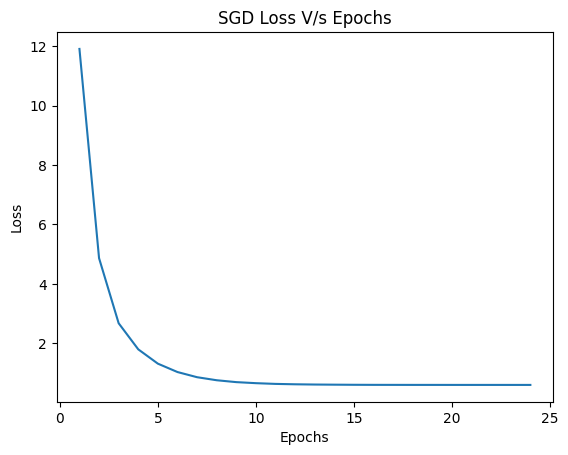

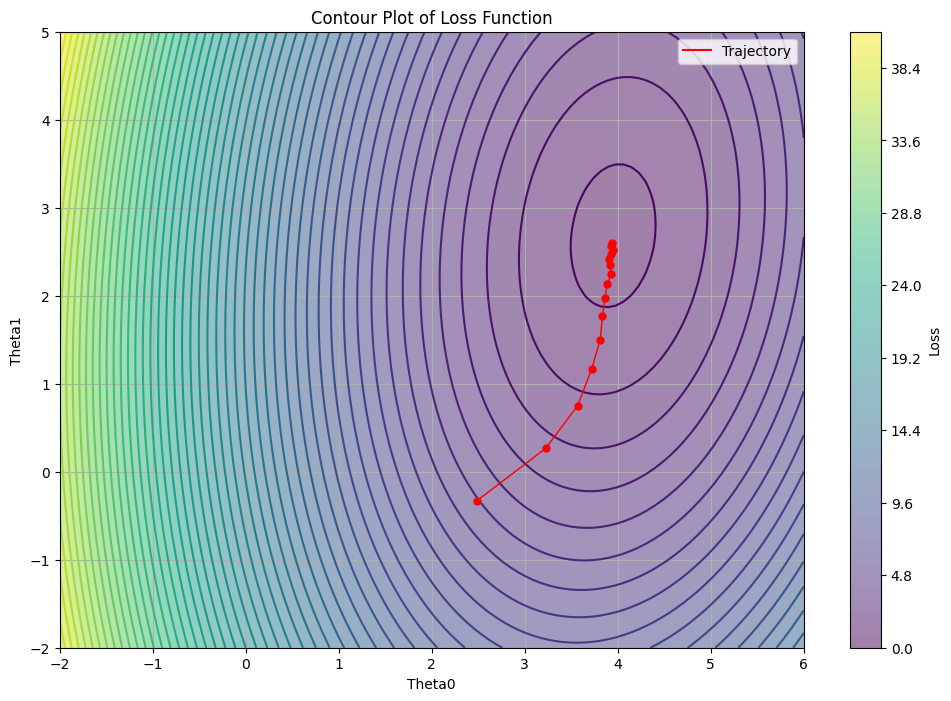

Average Iterations= 941.3333333333334
Average Epochs= 23.533333333333335
Optimal Learning Rate= 0.10000000149011612


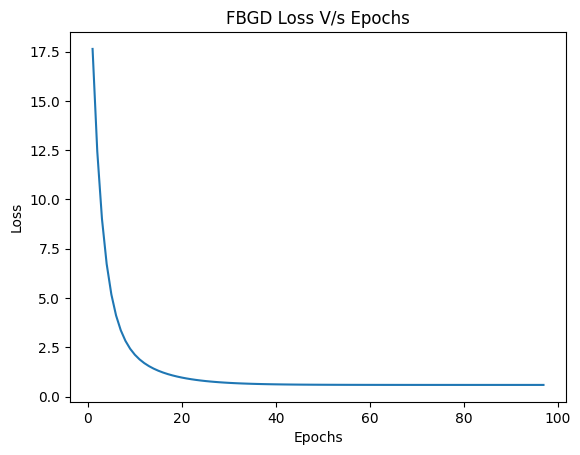

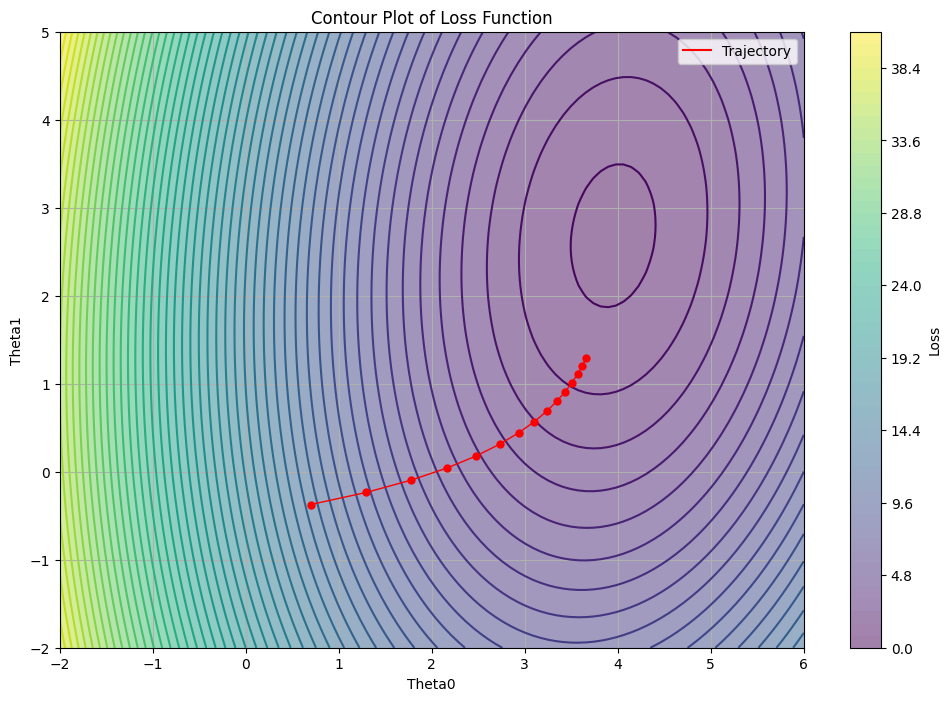

Average Iterations= 93.33333333333333
Average Epochs= 93.33333333333333
Optimal Learning Rate= 0.10000000149011612


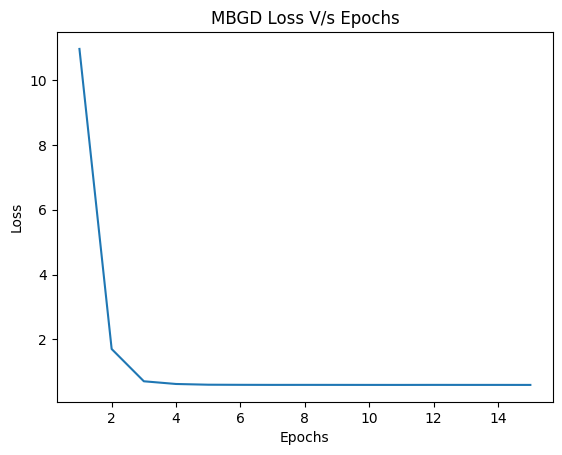

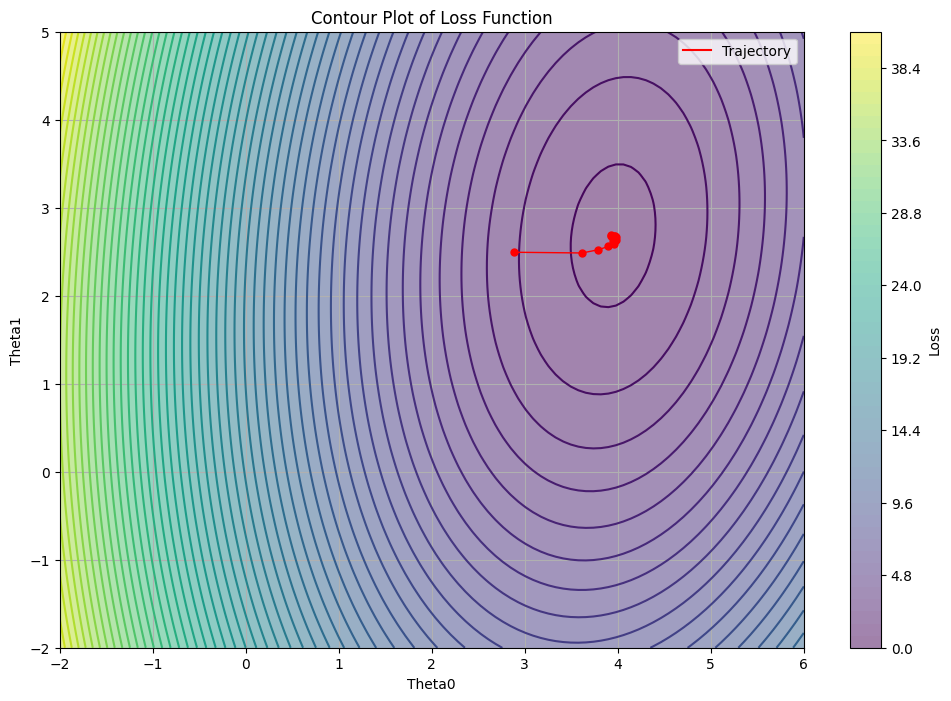

Average Iterations= 88.6
Average Epochs= 17.733333333333334


In [ ]:
def plotting_loss_and_contour(x1,y,method):
  np.random.seed(45)

  Theta0 = np.linspace(-2,6, 100)
  Theta1 = np.linspace(-2,5, 100)

  X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
  Ground_Truth = torch.tensor(y).unsqueeze(1)

  learning_rate = GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,method)
  iter_count=0
  epoch_count=0

  for r in range(15):
    number_of_epochs=0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)
    # print('Initial Theta0=',Theta0_tensor,'Initial Theta1=',Theta1_tensor,'Learning rate=',Optimal_learning_rate)
    history=[]
    losses_list=[]

    F_x=(Theta0_tensor.item()+Theta1_tensor.item()*X1)
    previous_loss=(avg_loss(F_x,Ground_Truth))
    if(method=='SGD'):
      while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):
          # if((Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
          #   break
          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            Theta0_tensor -= learning_rate * Theta0_tensor.grad
            Theta1_tensor -= learning_rate * Theta1_tensor.grad
            iter_count+=1
        if(len(history)<15):
          history.append((Theta0_tensor.item(), Theta1_tensor.item()))
        graphing_loss=previous_loss
        losses_list.append(graphing_loss.detach().numpy())
        previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
        number_of_epochs+=1
        epoch_count+=1

    elif(method=='FBGD'):
        number_of_batches=1
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
              break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              iter_count+=1
          if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
          graphing_loss=previous_loss
          losses_list.append(graphing_loss.detach().numpy())
          previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
          number_of_epochs+=1
          epoch_count+=1
        # print("Theta0=",Theta0_tensor.item(),"Theta1=",Theta1_tensor.item())
        # print('Number of Epochs=',number_of_epochs,'Number of Iterations=',iter_count)

    elif(method=='MBGD'):
        number_of_batches=5
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
              break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              iter_count+=1
          if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
          graphing_loss=previous_loss
          losses_list.append(graphing_loss.detach().numpy())
          previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
          number_of_epochs+=1
          epoch_count+=1


  x_axis=np.arange(1,number_of_epochs+1)
  y_axis=(losses_list)
  plt.plot(x_axis,y_axis)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'{method} Loss V/s Epochs')

  x1_np = x1
  y_np = Ground_Truth.numpy()
  Theta0_np = Theta0_tensor.item()
  Theta1_np = Theta1_tensor.item()
  X, Y = np.meshgrid(Theta0, Theta1)
  Z = f(X, Y, x1_np, y_np)
  plot_contour(X, Y, Z, filled=True, path=history)
  print("Average Iterations=",iter_count/15)
  print("Average Epochs=",epoch_count/15)

plotting_loss_and_contour(x1,y,'SGD')
plotting_loss_and_contour(x1,y,'FBGD')
plotting_loss_and_contour(x1,y,'MBGD')


Comparision of optimization processes

Avg no. of Iterations in SGD= 941.3

Avg no. of Iterations in Full Batch= 93.3

Avg no. of Iterations in Mini Batch= 88.6


Avg no. of Epochs in SGD= 23.53

Avg no. of Epochs in Full Batch= 93.3

Avg no. of Epochs in Mini Batch= 17.73

Stochastic Gradient Descent (SGD) is taking more Iterations to converge because it updates model parameters based on individual data points, which introduces randomness and noise into the optimization process. In contrast, methods like Full-Batch Gradient Descent and Mini-Batch Gradient Descent use the entire dataset for each update, providing more stable and accurate updates, which often leads to faster convergence. Therefore, while SGD can be faster in terms of iteration time, it generally requires more epochs to reach a satisfactory solution when compared with Full-Batch and Mini-Batch Gradient Descent.

Full Batch Gradient Descent takes larger number of Epochs when averaged over different learning rates, because it produces stable but conservative updates by computing gradients from the entire dataset. Additionally, since each epoch involves processing the whole dataset, it can take longer to reach acceptable loss levels, resulting in more epochs needed to achieve convergence.

Interpretations of Loss v/s Epochs for the Optimisation Processes

The Loss vs. Epochs plot for Full-Batch, Mini-Batch, and Stochastic Gradient Descent have distinct convergence behaviors. The Full-Batch Gradient Descent shows a steady decline in loss due to stable updates from the entire dataset, often requiring fewer epochs to reach a low loss value. In contrast, Stochastic Gradient Descent exhibits more fluctuations and oscillations because it updates parameters based on individual data points. Mini-Batch Gradient Descent strikes a balance between stability and speed, providing a more gradual decline in loss. The graph of Full Batch Gradient Descent is smooth while the graphs of Mini Batch Gradient Descent and Stochastic Gradient Descent are noisy.

4) Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an
ϵ
-neighborhood for both dataset. Choose
ϵ
=
0.001
. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. [2 marks]

In [ ]:
def plot_contour(X, Y, Z, filled=True, path=[], vectors=[]):
    plt.figure(figsize=(12, 8))
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')

    if filled:
        plt.contourf(X, Y, Z, levels=20, alpha=0.3, cmap='viridis')

    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=5, linestyle='-', linewidth=1)

    theta0, theta1, grad0, grad1, mom0, mom1 = zip(*vectors)

    plt.quiver(theta0, theta1, [-g for g in grad0], [-g for g in grad1],
                   color='blue',  scale_units='xy', scale=1, width=0.005, label='Gradient')

    plt.quiver(theta0, theta1, [-g for g in mom0], [-g for g in mom1],
                   color='green', scale_units='xy', scale=1, width=0.005, label='Momentum')

    plt.plot([], [], color='red', label='Trajectory')
    plt.colorbar(label='Loss')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.title('Contour Plot of Loss Function with Trajectory and Vectors')
    plt.legend()
    plt.grid(True)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.show()




In [ ]:
#Finding Optimal Momentum
#Full Batch
learning_rate = 0.1
optimal_momentum = None
min_loss = float('inf')

momentum_values = np.linspace(0, 1, 100)
prev_number_of_epochs=float('inf')
for momentum in momentum_values:
    torch.manual_seed(45)
    iter_count = 0
    epoch_count = 0
    number_of_epochs = 0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)

    history = []
    change_0 = 0
    change_1 = 0
    previous_loss = float('inf')

    while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        Theta0_tensor.grad = None
        Theta1_tensor.grad = None

        X = Theta1_tensor * torch.tensor(x1).unsqueeze(1) + Theta0_tensor
        individual_loss = loss(X, torch.tensor(y).unsqueeze(1))
        individual_loss = individual_loss.mean()
        individual_loss.backward()

        with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0

            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1

            iter_count += 1

        current_loss = individual_loss.item()

        number_of_epochs += 1

    if (number_of_epochs < prev_number_of_epochs and not torch.isnan(Theta0_tensor)):
        prev_number_of_epochs = number_of_epochs
        optimal_momentum = momentum

print(f"Optimal Momentum: {optimal_momentum}")

Optimal Momentum: 0.5858585858585859


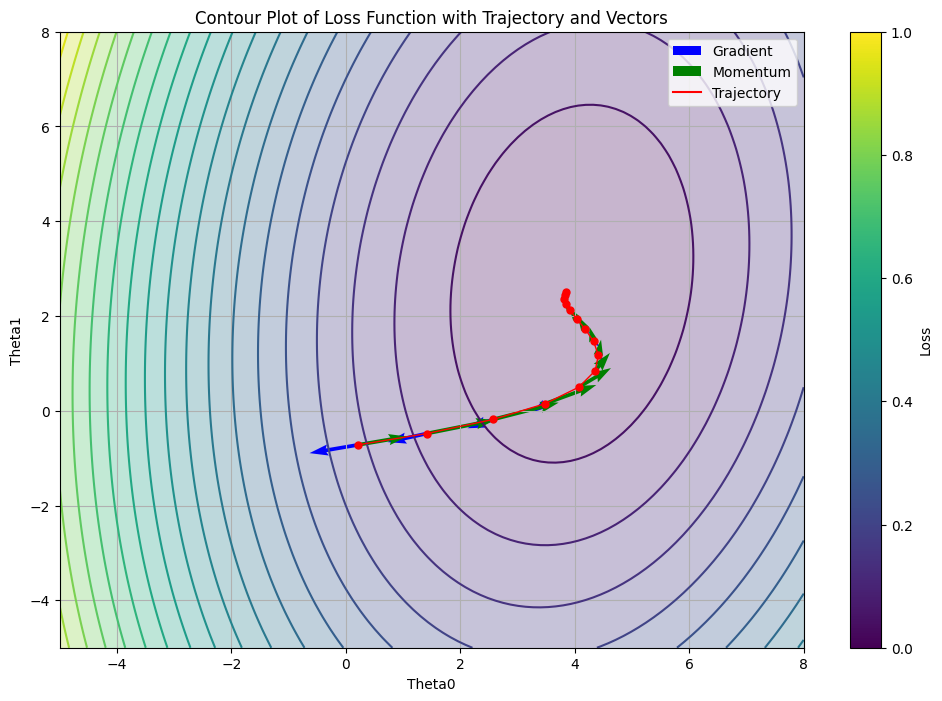

Theta0 = 3.951573610305786 Theta1 = 2.6290812492370605
Average Iterations= 23.6
Average Epochs= 23.6


In [ ]:
#Full Batch with Momentum Countour Plots till convergence
np.random.seed(45)
num_samples = 40

Theta0 = np.linspace(-5,8, 100)
Theta1 = np.linspace(-5,8, 100)

X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
Ground_Truth = torch.tensor(y).unsqueeze(1)
learning_rate = 0.1
iter_count=0
epoch_count=0
for r in range(15):
  number_of_epochs=0
  Theta0_tensor = torch.randn(1, requires_grad=True)
  Theta1_tensor = torch.randn(1, requires_grad=True)
    # print('Initial Theta0=',Theta0_tensor,'Initial Theta1=',Theta1_tensor,'Learning rate=',Optimal_learning_rate)
  history=[]
  vectors=[]
  number_of_batches = 1
  number_of_epochs = 0

  F_x = (Theta0_tensor.item() + Theta1_tensor.item() * X1)

  change_0=0
  change_1=0
  momentum=0.59

  while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
    Theta0_tensor.grad=None
    Theta1_tensor.grad=None
    X = Theta1_tensor *X1 + Theta0_tensor
    individual_loss = loss(X, Ground_Truth)
    individual_loss=individual_loss.mean()
    individual_loss.backward()

    with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1
            iter_count+=1
    grad0 = learning_rate * Theta0_tensor.grad.item()
    grad1 = learning_rate * Theta1_tensor.grad.item()
    mom0 = change_0.item()
    mom1 = change_1.item()
    if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
            vectors.append((Theta0_tensor.item(), Theta1_tensor.item(), -grad0, -grad1, mom0, mom1))
    number_of_epochs += 1
    epoch_count+=1

x1_np = x1
y_np = Ground_Truth.numpy()
Theta0_np = Theta0_tensor.item()
Theta1_np = Theta1_tensor.item()
X, Y = np.meshgrid(Theta0, Theta1)
Z = f(X, Y, x1_np, y_np)
plot_contour(X, Y, Z, filled=True, path=history,vectors=vectors)
print("Theta0 =", Theta0_tensor.item(), "Theta1 =", Theta1_tensor.item())
print("Average Iterations=",iter_count/15)
print("Average Epochs=",epoch_count/15)

In [ ]:
#Finding Optimal Momentum
learning_rate = 0.01
optimal_momentum = None
min_loss = float('inf')

momentum_values = np.linspace(0, 1, 10)
prev_number_of_iters=1000000000000
for momentum in momentum_values:
    torch.manual_seed(45)
    iter_count = 0
    epoch_count = 0
    number_of_epochs = 0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)

    history = []
    change_0 = 0
    change_1 = 0

    previous_loss = float('inf')

    while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):

          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1

            iter_count += 1

        number_of_epochs += 1

    if (iter_count < prev_number_of_iters and not torch.isnan(Theta0_tensor)):
        prev_number_of_iters = iter_count
        optimal_momentum = momentum

print(f"Optimal Momentum: {optimal_momentum}")

Optimal Momentum: 0.7777777777777777


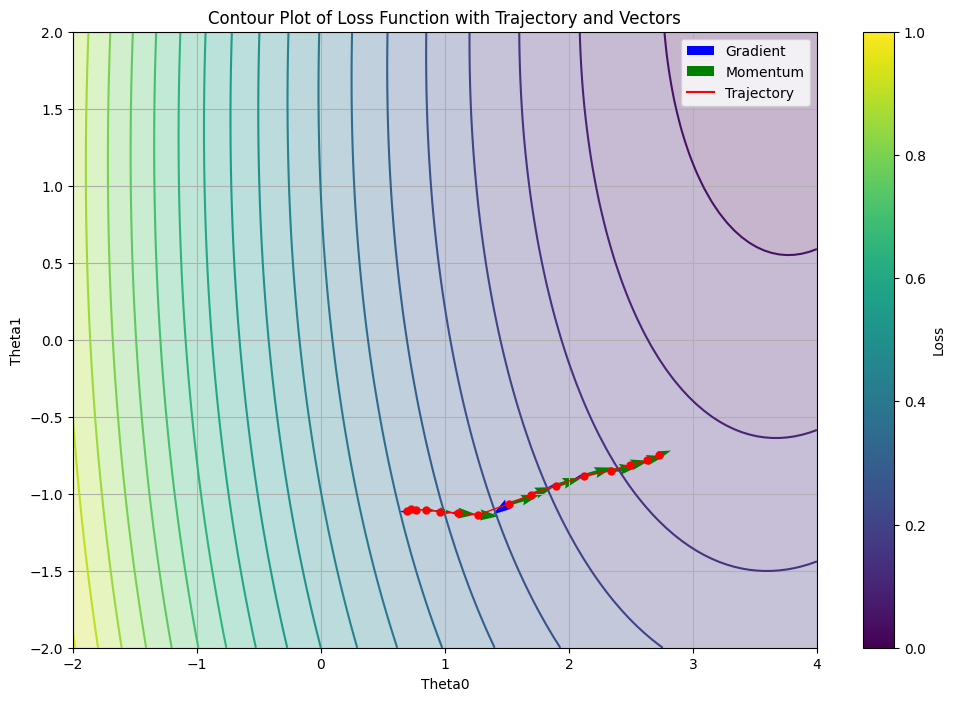

Theta0 = 3.9513978958129883 Theta1 = 2.672685384750366
Average Iterations= 1874.6666666666667
Average Epochs= 46.86666666666667


In [ ]:
np.random.seed(45)
num_samples = 40

X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
Ground_Truth = torch.tensor(y).unsqueeze(1)
learning_rate = 0.01
iter_count=0
epoch_count=0
for r in range(15):
  number_of_epochs=0
  Theta0_tensor = torch.randn(1, requires_grad=True)
  Theta1_tensor = torch.randn(1, requires_grad=True)
    # print('Initial Theta0=',Theta0_tensor,'Initial Theta1=',Theta1_tensor,'Learning rate=',Optimal_learning_rate)
  history=[]
  vectors=[]
  number_of_batches = 1
  number_of_epochs = 0

  F_x = (Theta0_tensor.item() + Theta1_tensor.item() * X1)
  # previous_loss = avg_loss(F_x, Ground_Truth)
  # net_loss = torch.tensor([10000000], requires_grad=False)

  change_0=0
  change_1=0
  momentum=0.77

  while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
    Theta0_tensor.grad=None
    Theta1_tensor.grad=None
    X = Theta1_tensor *X1 + Theta0_tensor
    indices = torch.randperm(num_samples)
    X1_shuffled = X1[indices]
    y_shuffled = Ground_Truth[indices]

    for i in range(num_samples):
        # if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
        #   break
        Theta0_tensor.grad = None
        Theta1_tensor.grad = None

        X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor
        individual_loss = loss(X, y_shuffled[i])
        individual_loss.backward()

        with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1
            iter_count+=1
        grad0 = learning_rate * Theta0_tensor.grad.item()
        grad1 = learning_rate * Theta1_tensor.grad.item()
        mom0 = change_0.item()
        mom1 = change_1.item()
        if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
            vectors.append((Theta0_tensor.item(), Theta1_tensor.item(), -grad0, -grad1, mom0, mom1))
    number_of_epochs += 1
    epoch_count+=1

x1_np = x1
y_np = Ground_Truth.numpy()
Theta0_np = Theta0_tensor.item()
Theta1_np = Theta1_tensor.item()
Theta0 = np.linspace(-2,4, 100)
Theta1 = np.linspace(-2,2, 100)
X, Y = np.meshgrid(Theta0, Theta1)
Z = f(X, Y, x1_np, y_np)
plot_contour(X, Y, Z, filled=True, path=history,vectors=vectors)
print("Theta0 =", Theta0_tensor.item(), "Theta1 =", Theta1_tensor.item())
print("Average Iterations=",iter_count/15)
print("Average Epochs=",epoch_count/15)

Comparision of optimization processes with and without Momentum

Without Momentum-

Avg no. of Iterations in SGD= 941.3

Avg no. of Iterations in Full Batch= 93.53

Avg no. of Epochs in SGD= 23.53

Avg no. of Epochs in Full Batch= 93.53


With Momentum-

Avg no. of Iterations in SGD= 1298

Avg no. of Iterations in Full Batch= 23.6

Avg no. of Epochs in SGD= 32.46

Avg no. of Epochs in Full Batch= 23.6

Momentum helps to smooth out the optimization path by accumulating past gradients, enabling the optimizer to navigate more efficiently toward the global minimum and overcome local minima. Momentum is beneficial for full batch method, reducing the number of iterations needed for convergence while the iterations and epochs with SGD increase indicating that while momentum can help with certain aspects of optimization, it may not always lead to faster convergence in stochastic settings. The inclusion of momentum significantly enhances the convergence efficiency of full batch method but reducing the efficieny of stochastic gradient descent.